# Non-Linear Classification 

- <b>In many real life problems,the data is not linearly separable,but we need to classify the data using any linear classifier like logistic regression.This can be done by projecting the data to a higher dimensions so that it becomes linearly separable.</b>
![](LinearlyAndNonlinearlySeprableData.png)

# Projecting Data to higher dimensions!
When working with non-linear datasets,we can project original feature vectors into higher dimensional space where they can be linearly separated!<br />
## Let us see some example

### Example 1 :
![](ProjectingDataToHigherDimension_1.png)

### Example 2 :
<b>Featured space is also reffered to as mapped surface or mapped space</b>
![](ProjectingDataToHigherDimension_2.png)

### Example 3:(Converting 2-D Concentric Circles into higher dimension and then introducing a plane between the data to classify two circles distinctly)
![](ProjectingDataToHigherDimension_3.png)<br/><br/><br/>
<b><i>Data Projected in 3-Dimensional Space in following figure , after processing the original data using a non-linear function.</i></b>
![](ProjectingDataToHigherDimension_4.png)
![](ProjectingDataToHigherDimension_5.png)


### Code 

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
X,Y = make_circles(n_samples = 500,noise = 0.02)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


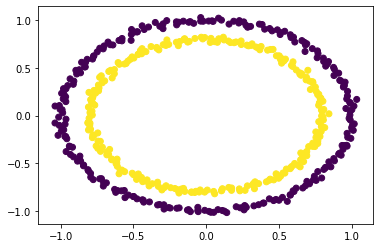

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [5]:
# Uptill now every example have 2 features but i want every example to have 3 features
def phi(X):
    """Non-Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2 # new feature
    
    X_ = np.zeros((X.shape[0],3)) # having number of examples equal to that in original data set and having 3 feature columns
    print(X_.shape)
    
    X_[:,:-1] = X # copying the values of 1st two features from the original dataset
    X_[:,-1] = X3 # putting the third feature int the third column of X_
    return X_

In [6]:
X_ = phi(X) # we cna now see that we got a matrix of the shape (500,3),ie we introduced the new feature

(500, 3)


In [7]:
# printing the first 3 rows of original data set ie X
print(X[:3,:])

[[ 0.17479088 -0.75833268]
 [-1.04027913 -0.0777545 ]
 [-0.05465631 -1.0062271 ]]


In [8]:
#printing the first 3 rows of the higher dimension dataset ie X_
print(X_[:3,:])
# we can observer that here we introduced another column

[[ 0.17479088 -0.75833268  0.60562031]
 [-1.04027913 -0.0777545   1.08822642]
 [-0.05465631 -1.0062271   1.01548029]]


In [9]:
def plot3d(X,show=True): # this function accepts a matrix ie X represents a matrix here
# we are introducing the show=True argument ,just because we are writting the line plt.show() int the function itself that print the plot,but if we do not write that line then we don't need to write the show=True argument  
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d') # 111 is the subplot id
    X1 = X[:,0] # X1 being the first feature
    X2 = X[:,1] # X1 being the second feature
    X3 = X[:,2] # X1 being the third feature
    
    ax.scatter(X1,X2,X3,zdir='z',s=50,c=Y,depthshade=True) # zdir=? asks for the axis that you to keep as z axis,depthshade=True/False is one parameter that helps to add some transperency to the pixels present at some depth,and 's=50' stands for the pixel size ie size of each point representing a single feature of an example
    if(show==True):
        plt.show()
    return ax

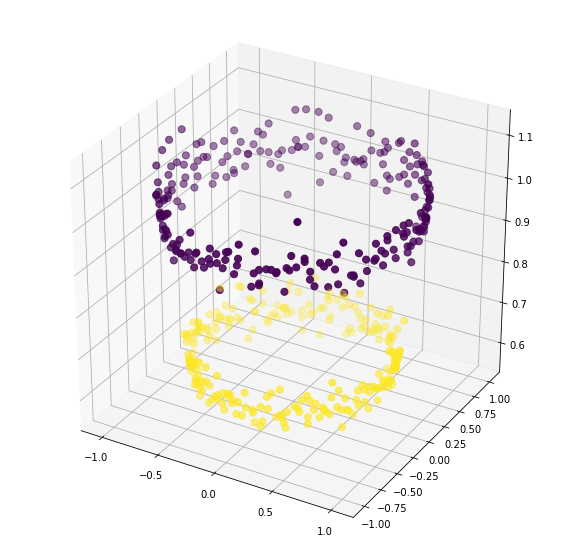

In [10]:
ax = plot3d(X_)

## Now Let's Figure out how well the results are using linear classifier on it

### Lets Test for the Logistic Classifier on both the datasets

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score # for doing some cross validations

In [12]:
lr = LogisticRegression()

In [13]:
initial_Accuracy = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f" %(initial_Accuracy*100))
# we can see that it gives a pretty bad accuracy because its trying to seprate the two classes using a straight line considering that thay are linearly seprated but since the data is non-linearly seprated so its giving a pretty bad accuracy of around 44% as expected

Accuracy X(2D) is 45.2000


- <b>Now implementing the Logistic Classifier on Higher Dimension Space</b>

In [14]:
# Logistic classifier on higher Dimension Space
higherDimension_Accuracy = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accurcy X(3D) is %.4f" %(higherDimension_Accuracy*100))

Accurcy X(3D) is 100.0000


- <b>Now lets Visualize the Decision Surface</b>

In [15]:
#Visualizing the decison surface
lr.fit(X_,Y) # training the logistic regression model on the data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#lr.coef_
weights = lr.coef_ # it will give the weights learned by the logistic regression model
print(weights)

# Since weights is a matrix therefore the 0th weight is given by (weights[0,0],weights[0,1],weights[0,2])

[[ 2.08443922e-02 -7.38114441e-03 -1.09008405e+01]]


In [17]:
#lr.intercept_
bias = lr.intercept_ # it will give the bias term learned by the logistic regression model

In [18]:
# basically if you want to create a surface plot you need to create a mesh grid
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

# and for these values of x and y then i can compute the z as done in the following cell
# Since weights is a matrix therefore the 0th weight is given by (weights[0,0],weights[0,1],weights[0,2])

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [19]:
z = -(weights[0,0]*xx + weights[0,1]*yy + bias)/weights[0,2]
print(z)

[[0.81591182 0.817824   0.81973619 0.82164837]
 [0.81523471 0.81714689 0.81905907 0.82097125]
 [0.81455759 0.81646977 0.81838195 0.82029414]
 [0.81388047 0.81579265 0.81770484 0.81961702]]


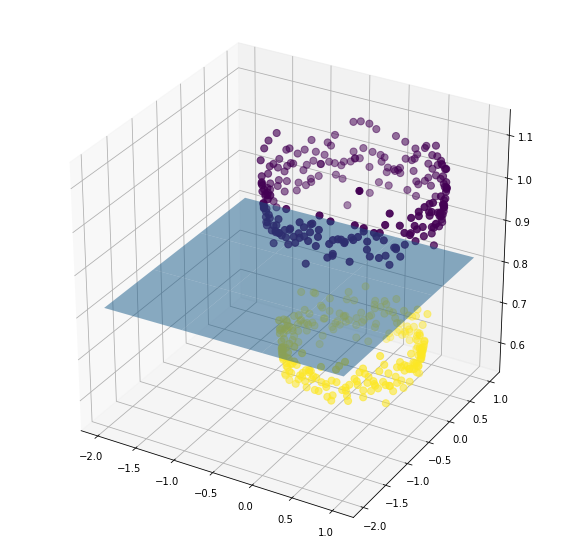

In [20]:
ax = plot3d(X_,False) # we passed here False to show argument of the function because we don't want the plt.show() line of the function to get implemented as we first need to make changes to the ax varible in which the other information of the plot is stored
#ax = plot3d(X_)
ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()

## Kernel Based Classification in SVM's

#### Sklearn supports the following types of Kernels,which can be used in many-real life problems.<br />
- Linear Kernel
- RBF Kernel
- Polynomial Kernel
- Sigmoid Kernel

<b><i>Kernel Trick</i></b> is method of using a linear classifier to solve a non-linear problem.It transforms the linearly in-separable data into linearly separable one

In [22]:
from sklearn import svm

### 1.Linear kernel SVM

In [46]:
svc = svm.SVC(kernel="linear") # it will use linear kernel and will thereby give bad accuracy,as it gave in case of logistic regression

In [47]:
svc.fit(X,Y) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
svc.score(X,Y) # you can check that for the same data logistic regression gave an accuracy of around 45% ,but the SVC with RBF kernel gives an accuracy of 100% for the same data,thats much better than the accuracy that the logistic regression gave for the same data before transformation 

# We get such a good accuracy because here we are not ussing linear kernel, as RBF krenel is being used by default, if we have used the linear kernel then the accuracy would have been as bad as we got in case of logistic regresiion for the same data before transformation

0.506

### 2. RBF Kernel SVM

In [62]:
rbf_svc = svm.SVC(kernel="rbf") # it by default uses RBF kernel, but still you can even explicitly specify kernel='rbf'

In [63]:
rbf_svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
rbf_svc.score(X,Y) # you can check that for the same data logistic regression gave an accuracy of around 45% ,but the SVC with RBF kernel gives an accuracy of 100% for the same data,thats much better than the accuracy that the logistic regression gave for the same data before transformation 

# We get such a good accuracy because here we are not ussing linear kernel, as RBF krenel is being used by default, if we have used the linear kernel then the accuracy would have been as bad as we got in case of logistic regresiion for the same data before transformation

1.0

### 3. Polynomial Kernel SVM

In [66]:
poly_svc = svm.SVC(kernel='poly') # kernel='poly' reffers to polynomial kernel

In [67]:
poly_svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
poly_svc.score(X,Y) # we can see that even for the polynomial kernel our data set gives a bad accuracy of around 53% , so uptill now rbf kernel have given the best accuracy for our dataset

0.532

### 4.Sigmoid Kernel

In [71]:
sigmoid_svc = svm.SVC(kernel='sigmoid')

In [72]:
sigmoid_svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
sigmoid_svc.score(X,Y) # so we can see that with sigmoid kernel also we get a very bad accuracy

0.496

### 5.Custom Kernel

In [76]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))
svc = svm.SVC(kernel = custom_kernel)
svc.fit(X,Y)
svc.score(X,Y) # here also we get an accuracy of 100% for this data set ie X,Y

1.0

## Mathematical Formulation
- https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
- https://scikit-learn.org/stable/modules/svm.html